In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import TruncatedSVD

h:\Netflix_Project\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
netflix_data = pd.read_csv(r'H:\Netflix_Project\data\NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [3]:
netflix_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [4]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [5]:
netflix_data.rating.unique()

<StringArray>
[   'TV-MA',        'R',    'PG-13',    'TV-14',    'TV-PG',       'NR',
     'TV-G',     'TV-Y',        nan,    'TV-Y7',       'PG',        'G',
    'NC-17', 'TV-Y7-FV',       'UR']
Length: 15, dtype: str

In [6]:
netflix_data.country.nunique()

681

In [7]:
netflix_data.cast

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                  NaN
Name: cast, Length: 7787, dtype: str

In [8]:
netflix_data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [9]:
netflix_data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
netflix_data.director

0                     NaN
1       Jorge Michel Grau
2            Gilbert Chan
3             Shane Acker
4          Robert Luketic
              ...        
7782          Josef Fares
7783          Mozez Singh
7784                  NaN
7785                  NaN
7786             Sam Dunn
Name: director, Length: 7787, dtype: str

In [11]:
netflix_data = netflix_data.dropna(subset=['description'])

netflix_data["country"] = netflix_data["country"].fillna("Unknown")

netflix_data["date_added"] = pd.to_datetime(netflix_data["date_added"], errors='coerce')

netflix_data["year_added"] = netflix_data["date_added"].dt.year

netflix_data["director"] = netflix_data["director"].fillna("Unknown")

netflix_data["cast"] = netflix_data["cast"].fillna("Unknown")

netflix_data["rating"] = netflix_data["rating"].fillna("Not Rated")

netflix_data = netflix_data.dropna(subset=["date_added"])

In [12]:
netflix_data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64

<Axes: xlabel='type'>

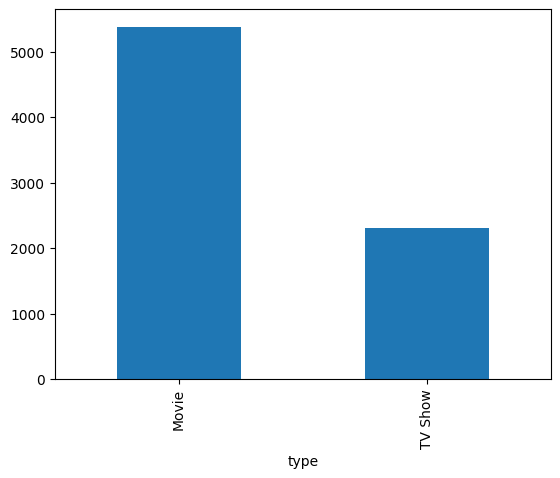

In [13]:
netflix_data["type"].value_counts().plot(kind='bar')

### CONTENT GROWTH OVER YEARS

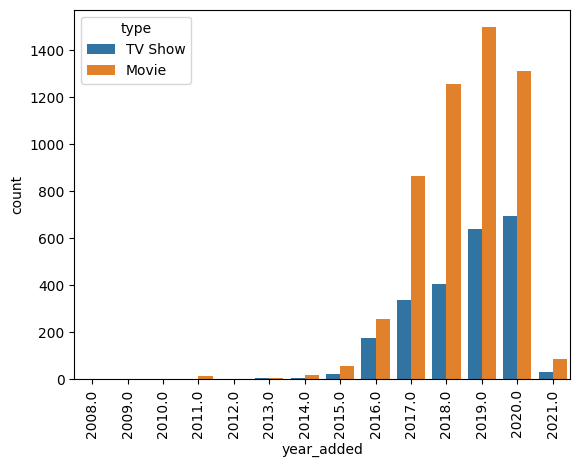

In [14]:
sns.countplot(x='year_added',hue="type", data=netflix_data)

plt.xticks(rotation=90)

plt.show()

### COUNTRY-WISE CONTENT ANALYSIS

<Axes: xlabel='country'>

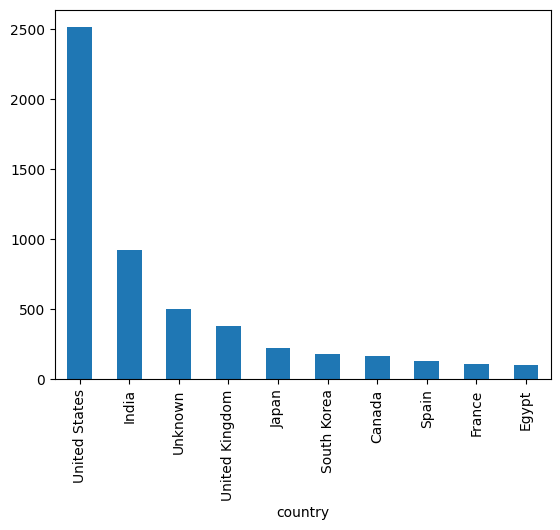

In [15]:
top_countries = netflix_data["country"].value_counts().head(10)
top_countries.plot(kind='bar')

In [17]:
pd.crosstab(netflix_data["country"],netflix_data["type"]).sort_values("Movie",ascending=False).head(10)

type,Movie,TV Show
country,,
United States,1850,665
India,852,70
Unknown,230,273
United Kingdom,193,188
Canada,118,51
Egypt,89,12
Spain,89,41
Turkey,73,27
Philippines,70,1


### TEXT-BASED CLUSTERING

In [18]:
netflix_data["combined_text"] = netflix_data["description"] + " " + netflix_data["listed_in"]

In [19]:
tfidf = TfidfVectorizer(stop_words='english',max_features=5000)
X = tfidf.fit_transform(netflix_data["combined_text"])

In [20]:
kmeans = KMeans(n_clusters=6, random_state=42)
netflix_data["cluster"] = kmeans.fit_predict(X)

In [21]:
netflix_data.groupby("cluster")["listed_in"].value_counts().head(10)

cluster  listed_in                                            
0        Documentaries                                            334
         Documentaries, International Movies                      172
         Documentaries, Music & Musicals                           73
         Documentaries, Sports Movies                              57
         Comedies, International Movies, Music & Musicals          53
         Dramas, International Movies, Music & Musicals            51
         Documentaries, International Movies, Sports Movies        38
         Documentaries, International Movies, Music & Musicals     32
         Documentaries, LGBTQ Movies                               20
         Docuseries                                                15
Name: count, dtype: int64

In [22]:
silhouette_score(X, netflix_data["cluster"])

0.013930023561380633

In [23]:
## so we got very week clusters.

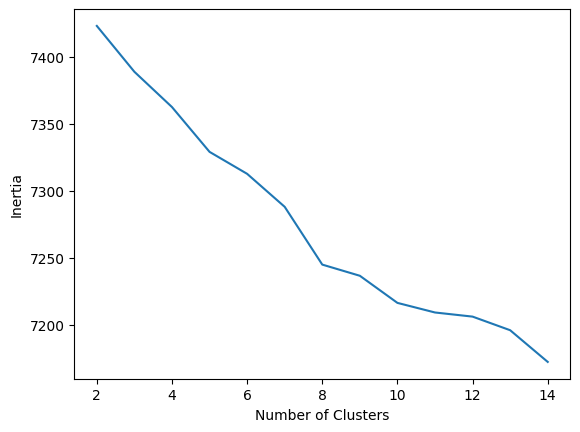

In [24]:
inertia = []

for k in range(2, 15):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    inertia.append(model.inertia_)

plt.plot(range(2, 15), inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [25]:
netflix_data["combined_text"] = netflix_data["description"] + " " + netflix_data["listed_in"] + " " + netflix_data["title"]

In [26]:
tfidf = TfidfVectorizer(stop_words='english',max_features=5000,ngram_range=(1,2))
X = tfidf.fit_transform(netflix_data["combined_text"])

In [27]:
model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = model.encode(netflix_data["combined_text"].tolist(), show_progress_bar=True)

Loading weights: 100%|██████████| 103/103 [00:00<00:00, 450.27it/s, Materializing param=pooler.dense.weight]                             
BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
Batches: 100%|██████████| 241/241 [00:57<00:00,  4.16it/s]


In [28]:
kmeans = KMeans(n_clusters=6, random_state=42)
netflix_data["cluster"] = kmeans.fit_predict(embeddings)

In [29]:
svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X)

kmeans = KMeans(n_clusters=6, random_state=42)
netflix_data["cluster"] = kmeans.fit_predict(X_reduced)

In [30]:
silhouette_score(X_reduced, netflix_data["cluster"])

0.06332189338386007

In [36]:
for i in range(6):
    print(f"\nCluster {i}")
    print(netflix_data[netflix_data["cluster"] == i]["listed_in"].value_counts().head(5))


Cluster 0
listed_in
Documentaries                          334
Documentaries, International Movies    172
Dramas                                 116
Comedies                                96
Reality TV                              80
Name: count, dtype: int64

Cluster 1
listed_in
Dramas, Independent Movies, International Movies    215
Children & Family Movies                            177
Children & Family Movies, Comedies                  169
Comedies, Dramas, Independent Movies                101
Dramas, Independent Movies                           94
Name: count, dtype: int64

Cluster 2
listed_in
International TV Shows, TV Dramas                         111
Crime TV Shows, International TV Shows, TV Dramas         104
International TV Shows, Romantic TV Shows, TV Dramas       85
International TV Shows, Romantic TV Shows, TV Comedies     79
Anime Series, International TV Shows                       68
Name: count, dtype: int64

Cluster 3
listed_in
Dramas, International Movies     

In [33]:
svd = TruncatedSVD(n_components=100, random_state=42)
X_reduced = svd.fit_transform(X)

kmeans = KMeans(n_clusters=6, random_state=42)
netflix_data["cluster"] = kmeans.fit_predict(X_reduced)

silhouette_score(X_reduced, netflix_data["cluster"])

0.06332189338386007

In [34]:
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_reduced)
    score = silhouette_score(X_reduced, labels)
    print(f"K={k}, Score={score}")

K=2, Score=0.14627614102523054
K=3, Score=0.05937702432474789
K=4, Score=0.04729186245209698
K=5, Score=0.05579358144336785
K=6, Score=0.06332189338386007
K=7, Score=0.07601688823630397
K=8, Score=0.08539035736550114
K=9, Score=0.09004044327225134
K=10, Score=0.10053079688424288
K=11, Score=0.10010499261977097


In [37]:
for i in range(2):
    print(f"\nCluster {i}")
    print(netflix_data[netflix_data["cluster"] == i]["listed_in"].value_counts().head(5))


Cluster 0
listed_in
Documentaries                          334
Documentaries, International Movies    172
Dramas                                 116
Comedies                                96
Reality TV                              80
Name: count, dtype: int64

Cluster 1
listed_in
Dramas, Independent Movies, International Movies    215
Children & Family Movies                            177
Children & Family Movies, Comedies                  169
Comedies, Dramas, Independent Movies                101
Dramas, Independent Movies                           94
Name: count, dtype: int64


In [38]:
pd.crosstab(netflix_data["cluster"], netflix_data["type"])

type,Movie,TV Show
cluster,,
0,1361,417
1,1425,0
2,0,1327
3,2260,1
4,1,518
5,330,49


In [79]:
netflix_data.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
listed_in        0
description      0
year_added       0
combined_text    0
cluster          0
dtype: int64

In [86]:
netflix_data = netflix_data.to_csv(r"H:\Netflix_Project\data\processed\cleaned_netflix_data.csv", index=False)